In [1]:
import pandas as pd
pd.options.plotting.backend = 'plotly'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import string
import copy
import re
import math

In [2]:
# Folder Path
path = "datasets/Tel_text"
  
# Read text File
def read_text_file(file):
    file_path = f"{path}/{file}"
    with open(file_path, 'r', encoding="utf8", errors='ignore') as f:
        return f.read()

i = 0
list_documents = []
# iterate through all file
for file in os.listdir(path):
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        i += 1
        globals()[f"{file[:-4]}"] = read_text_file(file)
        list_documents.append(globals()[f"{file[:-4]}"])

# Pre-processing

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words

In [4]:
def convert_lower_case(data):
    return np.char.lower(data)

def remove_stop_words(data):
    stop_words = stopwords.words('english') + stopwords.words('french')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")



def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w), lang="en")
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [5]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) # needed again as we need to stem the words
    data = remove_punctuation(data) # needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) # needed again as num2word is giving stop words 101 - one hundred and one
    
    return data

In [6]:
test_documents = list_documents[0:10]

for idx, val in enumerate(test_documents):
    test_documents[idx] = preprocess(val)

## TF - IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(test_documents)
tfidf_matrix.shape

(10, 27674)

## Cosine similarity

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(tfidf_matrix)
print('pairwise dense output:\n {}\n'.format(similarities))

pairwise dense output:
 [[1.         0.39341766 0.35595603 0.43856948 0.27935166 0.31300715
  0.20123686 0.46267617 0.24483929 0.3867369 ]
 [0.39341766 1.         0.48390909 0.48189967 0.40508729 0.34038657
  0.32625398 0.53073916 0.14308435 0.50425888]
 [0.35595603 0.48390909 1.         0.4588742  0.3928195  0.34337006
  0.2722677  0.52273473 0.14249812 0.49117823]
 [0.43856948 0.48189967 0.4588742  1.         0.35365867 0.3734062
  0.26171301 0.5985373  0.17954202 0.46007272]
 [0.27935166 0.40508729 0.3928195  0.35365867 1.         0.25434593
  0.23210766 0.41064956 0.12300812 0.37437635]
 [0.31300715 0.34038657 0.34337006 0.3734062  0.25434593 1.
  0.17729127 0.4364209  0.13133622 0.35203154]
 [0.20123686 0.32625398 0.2722677  0.26171301 0.23210766 0.17729127
  1.         0.27395733 0.0822706  0.26595698]
 [0.46267617 0.53073916 0.52273473 0.5985373  0.41064956 0.4364209
  0.27395733 1.         0.18318258 0.51444692]
 [0.24483929 0.14308435 0.14249812 0.17954202 0.12300812 0.1313362

In [9]:
adj_matrix = similarities
for i in range(10):
    adj_matrix[i, i] = 0

/var/folders/37/9ncc0zbd061cflxwwq4w1_z00000gn/T/ipykernel_69320/2336132023.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


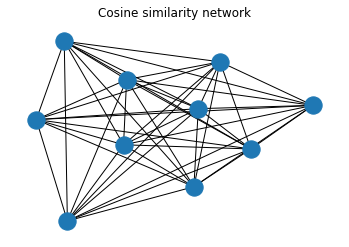

In [19]:
import networkx as nx

G = nx.from_numpy_matrix(similarities)
f = plt.figure()
plt.title("Cosine similarity network")
plt.axis('off')
nx.draw(G, ax=f.add_subplot(111))
f.show()
f.savefig("plots/graph.png")

## Stanza

In [11]:
import stanza
import spacy
import spacy_stanza

Init Plugin
Init Graph Optimizer
Init Kernel


In [12]:
# Import data

df_3000 = pd.read_excel("datasets/7000_sentences.xlsx", sheet_name="3000", usecols=["ID", "English", "German", "French"], index_col="ID")
df_6000 = pd.read_excel("datasets/7000_sentences.xlsx", sheet_name="6000", usecols=["ID", "English sentence", "German", "French"], index_col="ID")
df_6000.rename(columns={"English sentence": "English"}, inplace = True)
df = df_3000.append(df_6000)

In [ ]:
stanza.download(lang='en', model_dir ='./stanza_models')
nlp_en = spacy_stanza.load_pipeline("en", dir = './stanza_models')

In [14]:
df_eng = df["English"].dropna()

In [15]:
from lemminflect import getLemma, getAllInflectionsOOV
import random

list_df_noun = []
list_df_verb = []
dict_type = {"VB"  : "infinitive",
             "VBD" : "past tense",
             "VBG" : "present participle",
             "VBN" : "past participle",
             "VBP" : "non-3rd person singular present",
             "VBZ" : "3rd person singular present",
             "MD"  : "Modal"}

count = 0
for phrase in df_eng[:50]:
    count += 1
    if count % 50 == 0:
        print(count)

    list_noun = []
    list_verb = []
    doc = nlp_en(phrase)
    for token in doc:
        # Get noun and number
        if token.pos_ == 'NOUN' and len(token.morph.get("Number")) > 0:
            list_noun.append({token.text: token.morph.get("Number")[0]})
        
        # Get verb
        if token.pos_ == 'VERB':
            prefix = ''
            if len(token.morph.get("Voice")) > 0 and token.morph.get("Voice")[0] == "Pass":
                temp_token = token
                while temp_token.nbor(-1).pos_ == "AUX":
                    prefix = temp_token.nbor(-1).text + ' ' + prefix
                    temp_token = temp_token.nbor(-1)
            
            # Get lema
            lemma_verb = getLemma(token.text, upos='VERB')[0]
            # Get inflections
            inflections_verb = getAllInflectionsOOV(lemma_verb, upos='VERB')
            i, D1, D2, D3, F_D1, F_D2, F_D3 = 0, '', '', '', '', '' ,''
            # Shuffle inflections dict for randomness
            l = list(inflections_verb.items())
            random.shuffle(l)
            inflections_verb = dict(l)
            for key, value in inflections_verb.items():
                if not (value in [prefix + token.text, D1, D2, D3]):
                    i += 1
                    globals()[f"D{i}"] = value[0]
                    globals()[f"F_D{i}"] = dict_type[key]
                
            list_verb.append({"Answer": prefix + token.text,
                              "F_Answer": dict_type[token.tag_],
                              "Lemma": lemma_verb,
                              "D1": D1,
                              "D2": D2,
                              "D3": D3,
                              "F_D1": F_D1,
                              "F_D2": F_D2,
                              "F_D3": F_D3
                             })
    
    # Add noun
    for noun in list_noun:
        for key, value in noun.items():
            list_df_noun.append([phrase, key, value])
            
    # Add verb
    for verb in list_verb:
        question = phrase.replace(verb["Answer"], '...')
        list_df_verb.append([phrase, question, verb["Lemma"],
                             verb["Answer"], verb["D1"], verb["D2"], verb["D3"],
                             verb["F_Answer"], verb["F_D1"], verb["F_D2"], verb["F_D3"]
                            ])

50


In [16]:
df_noun = pd.DataFrame(list_df_noun, columns=["Phrase", "Noun", "Number"])
df_noun

,Phrase,Noun,Number
0,The beauty of the landscape struck the travell...,beauty,Sing
1,The beauty of the landscape struck the travell...,landscape,Sing
2,The beauty of the landscape struck the travell...,travellers,Plur
3,Nobody knows the truth about this affair.,truth,Sing
4,Nobody knows the truth about this affair.,affair,Sing
...,...,...,...
67,The road is wide enough for two cars.,cars,Plur
68,"The trip was too long, I am exhausted.",trip,Sing
69,"My stay here has been too short, I have to com...",stay,Sing
70,She bought a pretty dress.,dress,Sing


In [17]:
df_verb = pd.DataFrame(list_df_verb, columns=["Phrase", "Question", "Lemma", "Answer", "D1", "D2", "D3",
                                             "F_Answer", "F_D1", "F_D2", "F_D3"])
df_verb.head(10)

,Phrase,Question,Lemma,Answer,D1,D2,D3,F_Answer,F_D1,F_D2,F_D3
0,The beauty of the landscape struck the travell...,The beauty of the landscape ... the travellers.,strike,struck,strike,striking,striked,past tense,infinitive,present participle,past tense
1,Nobody knows the truth about this affair.,Nobody ... the truth about this affair.,know,knows,knowed,knows,knowed,3rd person singular present,past tense,3rd person singular present,past participle
2,"In a dictatorship, freedom of expression is li...","In a dictatorship, freedom of expression ....",limit,is limited,limit,limited,limited,past participle,infinitive,past tense,past participle
3,He did not help you out of kindness.,He did not ... you out of kindness.,help,help,helps,helping,helped,infinitive,3rd person singular present,present participle,past tense
4,His wickedness had no limits.,His wickedness ... no limits.,have,had,haved,haves,have,past tense,past tense,3rd person singular present,infinitive
5,His elegance impressed the assembly.,His elegance ... the assembly.,impress,impressed,impressed,impressed,impress,past tense,past participle,past tense,infinitive
6,There is a big difference between the western ...,There ... a big difference between the western...,be,is,be,bed,bes,3rd person singular present,infinitive,past tense,3rd person singular present
7,He has high ideals.,He ... high ideals.,have,has,haved,having,have,3rd person singular present,past participle,present participle,infinitive
8,He was struck by the modernity of the undergro...,He ... by the modernity of the underground.,strike,was struck,striked,strike,strikes,past participle,past tense,infinitive,3rd person singular present
9,The quality of his work was acknowledged by th...,The quality of his work ... by the jury.,acknowledge,was acknowledged,acknowledged,acknowledging,acknowledges,past participle,past participle,present participle,3rd person singular present


In [18]:
#df_verb.to_csv("English_MCQ.csv")